# Setup

bathymetry: https://www.fatiando.org/harmonica/dev/sample_data/earth_topography.html

In [1]:
# import your standard packages
%run pkgs.py

# import your local functions
sys.path.insert(1, '../')
from local_functions import *

# make sure the figures plot inline rather than at the end
%matplotlib inline

Default libraries loaded.


# Paths and Parameters

In [2]:
# bounds_AS = [68,79,3,20]
# bounds_SL = [79,87,3,10]
# bounds_wBoB = [79,87,10,21]
# bounds_BoB = [87,100,0,23]
# bounds_plt = [65,100,0,30]

bounds_AS = [68,79,3,20]
bounds_wBoB = [79,87,2,21]
bounds_BoB = [87,100,0,23]
bounds_plt = [65,100,0,30]


# Get Data

In [3]:
ds_WOD = xr.open_dataset('../data/wod_processed.nc')
ds_WOD

<xarray.Dataset>
Dimensions:                      (coastal_loc: 341437, coastal_pos: 139423, lonmin,lonmax,latmin,latmax: 4, pres: 57, time: 341437)
Coordinates:
  * time                         (time) datetime64[ns] 1770-01-01 ... 2020-05-31
  * pres                         (pres) int64 0 5 10 15 ... 1350 1400 1450 1500
  * coastal_loc                  (coastal_loc) int64 0 1 2 ... 341435 341436
  * coastal_pos                  (coastal_pos) int64 0 1 2 ... 139421 139422
  * lonmin,lonmax,latmin,latmax  (lonmin,lonmax,latmin,latmax) int64 0 1 2 3
Data variables:
    temp                         (time, pres) float64 ...
    sal                          (time, pres) float64 ...
    doxy                         (time, pres) float64 ...
    nitrate                      (time, pres) float64 ...
    phosphate                    (time, pres) float64 ...
    lat                          (time) float32 ...
    lon                          (time) float32 ...
    cast_id                      (ti

In [4]:
# get sla coastlines
# load coastlines
ds_CL= xr.open_dataset('../data/sla_processed.nc')
ds_CL

<xarray.Dataset>
Dimensions:           (day_time: 10013, lat: 138, loc_list: 5, lon: 216, month: 12, no_stations: 367, time: 329)
Coordinates:
  * lon               (lon) float64 48.62 48.88 49.12 ... 101.9 102.1 102.4
  * lat               (lat) float64 -1.375 -1.125 -0.875 ... 32.38 32.62 32.88
  * time              (time) datetime64[ns] 1993-01-01 1993-02-01 ... 2020-05-01
  * day_time          (day_time) datetime64[ns] 1993-01-01 ... 2020-05-31
  * month             (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * no_stations       (no_stations) float64 1.0 2.0 3.0 ... 365.0 366.0 367.0
  * loc_list          (loc_list) int64 0 75 225 313 366
Data variables:
    daily_sla         (day_time, lat, lon) float64 ...
    mon_sla           (time, lat, lon) float64 ...
    mon_sla_mon_clim  (month, lat, lon) float64 ...
    mon_sla_mon_anom  (time, lat, lon) float64 ...
    sta_loninds       (no_stations) int64 ...
    sta_latinds       (no_stations) int64 ...
    sta_lon           (no_station

In [5]:
ds_HE = xr.open_dataset('../data/breitburg_processed.nc')
ds_HE

<xarray.Dataset>
Dimensions:  (decade: 27)
Coordinates:
  * decade   (decade) float64 1.98e+03 2e+03 2e+03 2e+03 ... 2e+03 2e+03 2e+03
Data variables:
    etype    (decade) int64 ...
    lat      (decade) float64 ...
    lon      (decade) float64 ...

# Make Plot

length Temperature Only:  109865
length Temperature Total:  114524
Min Time:  <xarray.DataArray 'time' ()>
array('1770-01-01T00:00:00.000000000', dtype='datetime64[ns]')
Max Time:  <xarray.DataArray 'time' ()>
array('2020-05-31T00:00:00.000000000', dtype='datetime64[ns]')
length Both:  4659
Min Time:  <xarray.DataArray 'time' ()>
array('1770-01-01T00:00:00.000000000', dtype='datetime64[ns]')
Max Time:  <xarray.DataArray 'time' ()>
array('2020-05-24T00:00:00.000000000', dtype='datetime64[ns]')
length Doxy Only:  728
length Doxy Total:  5387
Min Time:  <xarray.DataArray 'time' ()>
array('1948-04-20T00:00:00.000000000', dtype='datetime64[ns]')
Max Time:  <xarray.DataArray 'time' ()>
array('2020-03-18T00:00:00.000000000', dtype='datetime64[ns]')


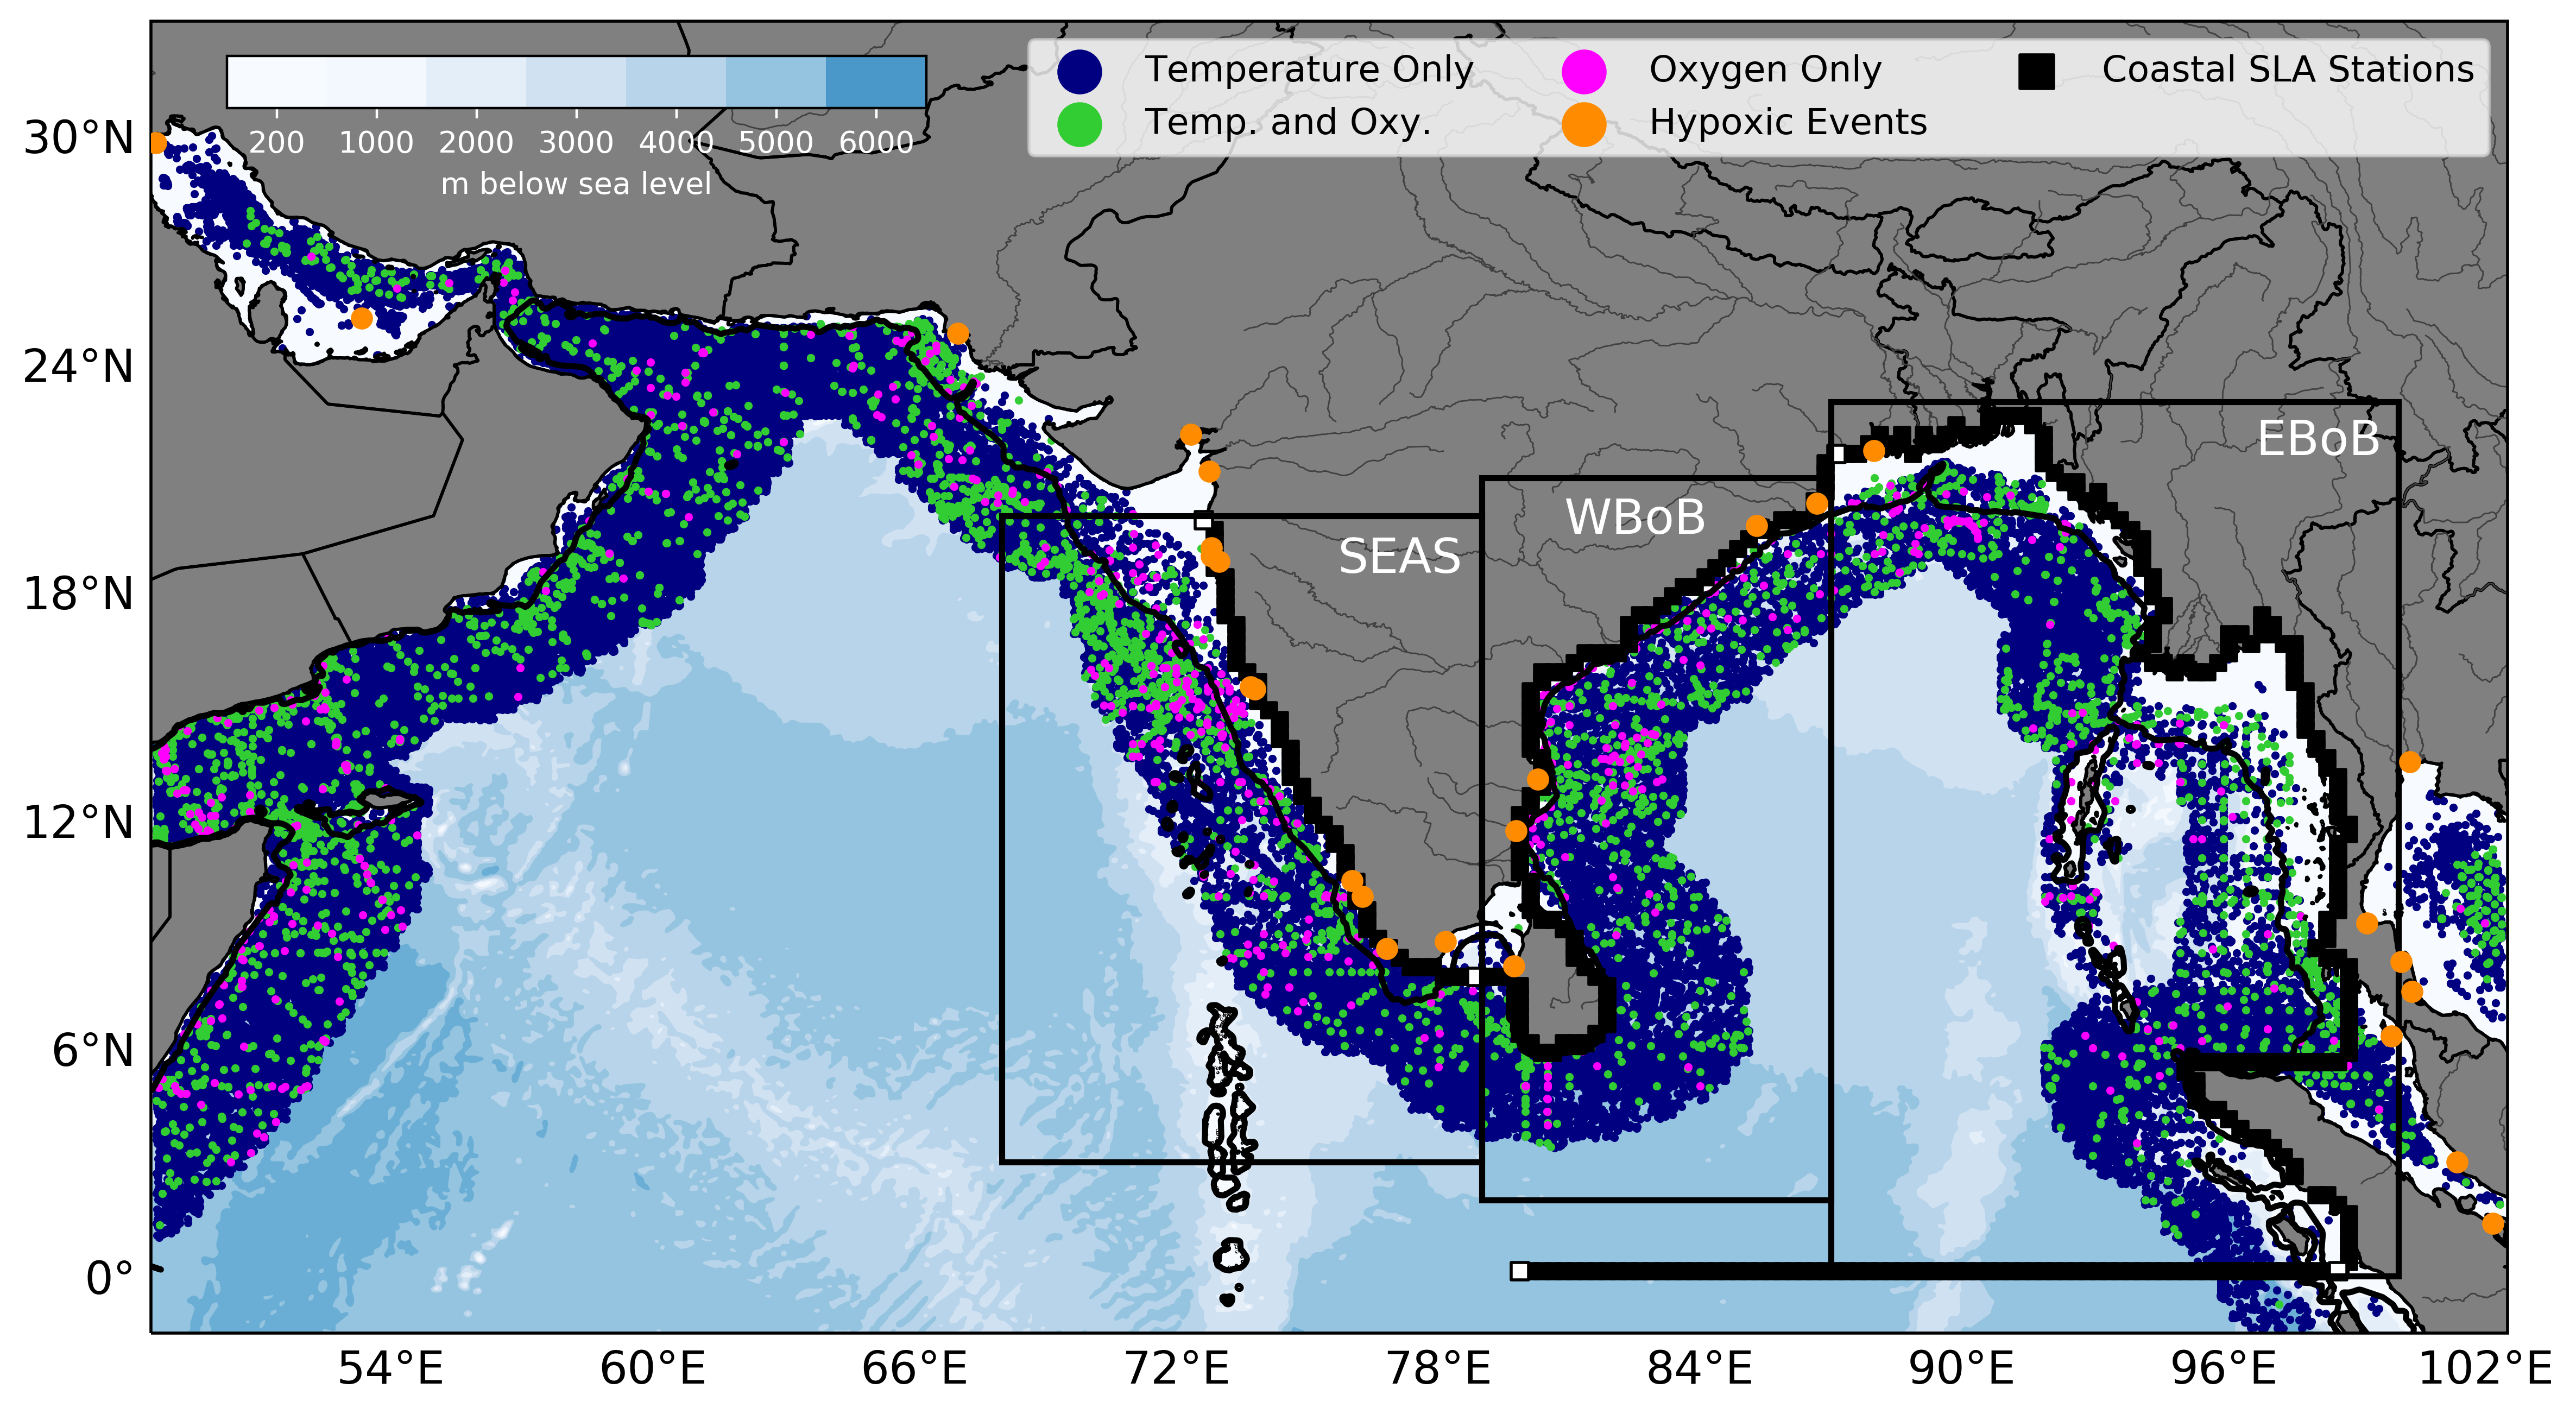

In [6]:
# # Plotting Full Indian Ocean

# limits 
cbounds = [48.5,102.5,-1.5,33]
cmin = 20
cmax = 160
sz = 12
cmap = plt.cm.Spectral # plt.cm.PuOr
clrs = ['navy','limegreen','magenta','darkorange']
fig, ax = plt.subplots(nrows = 1, ncols = 1,figsize=(14,8), dpi = 400,subplot_kw={'projection': ccrs.PlateCarree()})


# add in nansum cond for the columns condition to remove data where there weren't any profiles for oxygen?
mask = mask_coast(np.array(ds_WOD.lon),np.array(ds_WOD.lat),cbounds)
lat = ds_WOD.lat[mask]
lon = ds_WOD.lon[mask]
t = ds_WOD.time[mask]
temp = ds_WOD.temp[mask]
doxy = ds_WOD.doxy[mask]
pres = ds_WOD.pres
upper_doxy = doxy[:,(pres>=50) & (pres<=200)]
upper_temp = temp[:,(pres>=50) & (pres<=200)]
doxy_flag = ~np.isnan(ds_WOD.doxy_50_200[mask])
temp_flag = ~np.isnan(ds_WOD.temp_50_200[mask])


add_bathy(ax,cbounds)

####### Profiles ##############################################################
# Temp
ind = (~doxy_flag) & (temp_flag)
p = ax.scatter(lon[ind],lat[ind],s=sz,marker = '.',c=clrs[0],cmap=cmap,vmin=cmin,vmax=cmax,
                       transform=ccrs.PlateCarree(), label = 'Temperature Only')
print('length Temperature Only: ', len(lon[ind]))
print('length Temperature Total: ', len(lon[temp_flag]))
print('Min Time: ', np.min(t[ind]))
print('Max Time: ', np.max(t[ind]))

# Temperature and oxygen
ind = (doxy_flag) & (temp_flag)
p = ax.scatter(lon[ind],lat[ind],s=sz,marker = '.',c=clrs[1],cmap=cmap,vmin=cmin,vmax=cmax,
                       transform=ccrs.PlateCarree(), label = 'Temp. and Oxy.')
print('length Both: ', len(lon[ind]))
print('Min Time: ', np.min(t[ind]))
print('Max Time: ', np.max(t[ind]))

# Doxy
ind = (doxy_flag) & (~temp_flag)
p = ax.scatter(lon[ind],lat[ind],s=sz,marker = '.',c=clrs[2],cmap=cmap,vmin=cmin,vmax=cmax,
                       transform=ccrs.PlateCarree(), label = 'Oxygen Only')
print('length Doxy Only: ', len(lon[ind]))
print('length Doxy Total: ', len(lon[doxy_flag]))
print('Min Time: ', np.min(t[ind]))
print('Max Time: ', np.max(t[ind]))



####### Hypoxic Events ##############################################
ax.scatter(ds_HE.lon,ds_HE.lat,s=sz,marker = '.',c=clrs[3],
                       transform=ccrs.PlateCarree(), label = 'Hypoxic Events')
#replot with better markersize - no legend label
ax.scatter(ds_HE.lon,ds_HE.lat,s=40,marker = 'o',c=clrs[3],
                       transform=ccrs.PlateCarree(), zorder = 4)
###### SLA ###################################################################

# add coastal hovemuller white squares and to legend
p = ax.scatter(ds_CL.sta_lon,ds_CL.sta_lat,s=2,marker = 's',c='k', edgecolors='k',
                       transform=ccrs.PlateCarree(), label = 'Coastal SLA Stations')
p = ax.scatter(ds_CL.sta_lon,ds_CL.sta_lat,s=25,marker = 's',c='k', edgecolors='k',
                       transform=ccrs.PlateCarree(), zorder = 3)
p = ax.scatter(ds_CL.sta_lon[ds_CL.loc_list],ds_CL.sta_lat[ds_CL.loc_list],s=35,marker = 's',c='w', edgecolors='k',
                       transform=ccrs.PlateCarree(), zorder = 3)

# AS and BoB Boxes
box_bounds = [bounds_AS,
         bounds_wBoB,
         bounds_BoB]  #lonmin,lonmax, latmin, latmax 
clrs = ['k','k','k','k']
add_land(ax,cbounds, countries = True, rivers = True, lakes = True)
add_box(ax,box_bounds,clrs)

# box labels
plt.text(0.92, 0.68, 'EBoB', horizontalalignment='center', fontsize = 16,color = 'w',
     verticalalignment='center', transform=ax.transAxes, zorder = 4)

plt.text(0.63, 0.62, 'WBoB', horizontalalignment='center', fontsize = 16,color = 'w',
     verticalalignment='center', transform=ax.transAxes, zorder = 4)

plt.text(0.53, 0.59, 'SEAS', horizontalalignment='center', fontsize = 16,color = 'w',
     verticalalignment='center', transform=ax.transAxes, zorder = 4)

import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch

l = ax.legend(markerscale = 8,fontsize=12,ncol = 3, facecolor = 'w');
    

add_single_bathy_cline(ax,200)
# add_bathy_clines(ax,cbounds, lmax = 10000)
cbar = add_bathy_cbar(fig,ax, lmax = 6000,pos = [0.15, .83, 0.23, 0.03])
cbar.set_label(label = 'm below sea level', color = 'w')
cbar.ax.tick_params(axis='x', colors='w')

# do this labeled with temp, doxy, temp + doxy measurements

# Just Profiling Floats to Makr 200dbar shelf break

length WOD:  34042
Min Time:  <xarray.DataArray 'time' ()>
array('1994-11-07T00:00:00.000000000', dtype='datetime64[ns]')
Max Time:  <xarray.DataArray 'time' ()>
array('2020-05-31T00:00:00.000000000', dtype='datetime64[ns]')


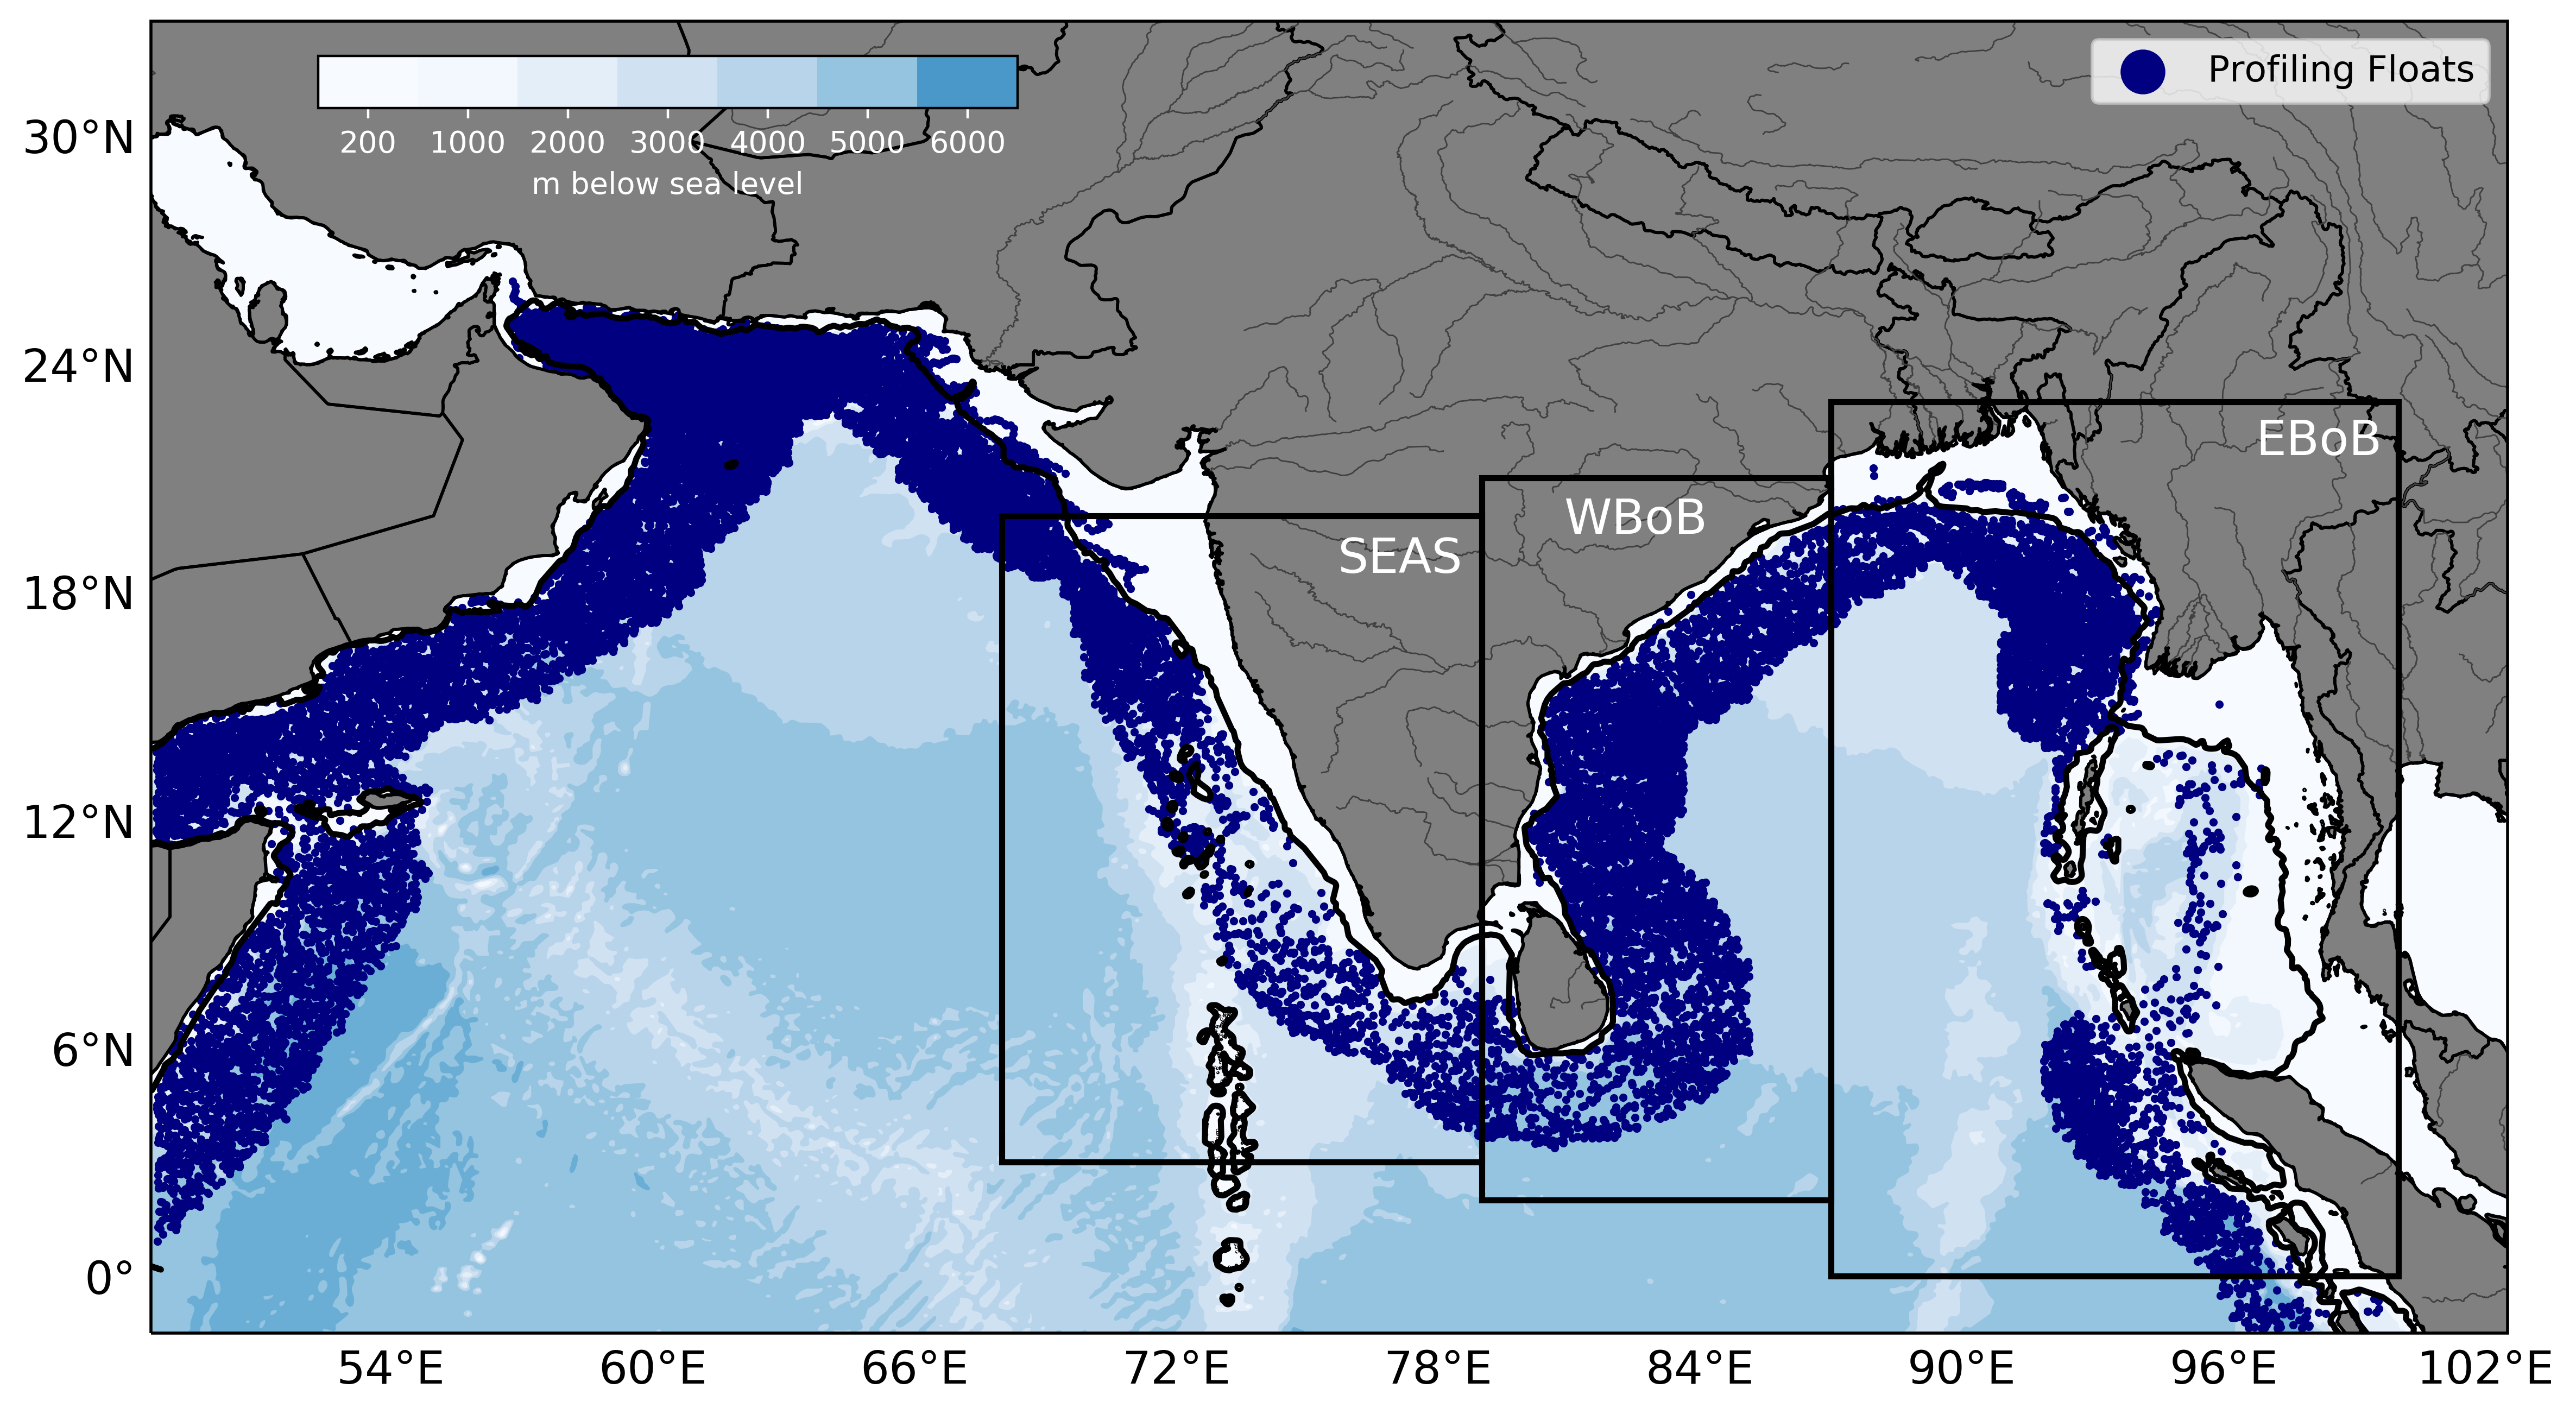

In [7]:
# # Plotting Full Indian Ocean

# limits 
cbounds = [48.5,102.5,-1.5,33]
cmin = 20
cmax = 160
sz = 12
cmap = plt.cm.Spectral # plt.cm.PuOr
# clrs = ['b','r','orange','lightgreen']
clrs = ['navy','red','darkgreen','magenta','orange','purple']

fig, ax = plt.subplots(nrows = 1, ncols = 1,figsize=(14,8), dpi = 400,subplot_kw={'projection': ccrs.PlateCarree()})


# add in nansum cond for the columns condition to remove data where there weren't any profiles for oxygen?
mask = mask_coast(np.array(ds_WOD.lon),np.array(ds_WOD.lat),cbounds)
lat = ds_WOD.lat[mask]
lon = ds_WOD.lon[mask]
cast_id = ds_WOD.cast_id[mask]
res = [str(i) for i in np.array(cast_id)]
PFL_flag = [idx for idx, s in enumerate(res) if 'PFL' in s]


add_bathy(ax,cbounds)

####### Profiles ##############################################################
# PFL only
ind = PFL_flag
p = ax.scatter(lon[ind],lat[ind],s=sz,marker = '.',c=clrs[0],cmap=cmap,vmin=cmin,vmax=cmax,
                       transform=ccrs.PlateCarree(), label = 'Profiling Floats')
print('length WOD: ', len(lon[ind]))
print('Min Time: ', np.min(t[ind]))
print('Max Time: ', np.max(t[ind]))

# AS and BoB Boxes
box_bounds = [bounds_AS,
         bounds_wBoB,
         bounds_BoB]  #lonmin,lonmax, latmin, latmax 
clrs = ['k','k','k','k']
add_land(ax,cbounds, countries = True, rivers = True, lakes = True)
add_box(ax,box_bounds,clrs)

# box labels
plt.text(0.92, 0.68, 'EBoB', horizontalalignment='center', fontsize = 16,color = 'w',
     verticalalignment='center', transform=ax.transAxes, zorder = 4)

plt.text(0.63, 0.62, 'WBoB', horizontalalignment='center', fontsize = 16,color = 'w',
     verticalalignment='center', transform=ax.transAxes, zorder = 4)

plt.text(0.53, 0.59, 'SEAS', horizontalalignment='center', fontsize = 16,color = 'w',
     verticalalignment='center', transform=ax.transAxes, zorder = 4)

import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch

l = ax.legend(markerscale = 8,fontsize=12,ncol = 3, facecolor = 'w');
    

add_single_bathy_cline(ax,200)
# add_bathy_clines(ax,cbounds, lmax = 10000)
cbar = add_bathy_cbar(fig,ax, lmax = 6000,pos = [0.18, .83, 0.23, 0.03])
cbar.set_label(label = 'm below sea level', color = 'w')
cbar.ax.tick_params(axis='x', colors='w')

# do this labeled with temp, doxy, temp + doxy measurements

In [8]:
cast_id[PFL_flag]

<xarray.DataArray 'cast_id' (time: 34042)>
array([array('PFL_10081131', dtype=object),
       array('PFL_10081132', dtype=object),
       array('PFL_10081133', dtype=object), ...,
       array('PFL_19977647', dtype=object),
       array('PFL_19977648', dtype=object),
       array('PFL_19977738', dtype=object)], dtype=object)
Coordinates:
  * time     (time) datetime64[ns] 1994-11-07 1994-11-07 ... 2020-05-31